### Hipótese escolhida (1)
Estudantes com Acesso_Internet = Ruim/Instável apresentam maior risco de evasão (Risco_Evasao = 1), considerando também Faltas_Percentual, Trabalho_Horas_Semanais e Deslocamento_Minutos.

Objetivo: treinar um KNN Classifier para `Risco_Evasao`, comparar k × distâncias (euclidiana/manhattan), avaliar desempenho e analisar matriz de confusão por estratos de `Acesso_Internet`. Autor: Luigi Garotti. Curso: 2º semestre.

Formato: (500, 34)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Regiao                         500 non-null    object 
 1   Localidade                     500 non-null    object 
 2   Cidade_Tamanho                 500 non-null    object 
 3   Tipo_IES                       500 non-null    object 
 4   Modalidade                     500 non-null    object 
 5   Periodo                        500 non-null    object 
 6   Area                           500 non-null    object 
 7   Genero                         500 non-null    object 
 8   Cor_Raca                       500 non-null    object 
 9   Idade                          500 non-null    int64  
 10  Renda_Familiar_SM              500 non-null    float64
 11  Escola_Medio                   500 non-null    object 
 12  Acesso_Internet         

,Regiao,Localidade,Cidade_Tamanho,Tipo_IES,Modalidade,Periodo,Area,Genero,Cor_Raca,Idade,...,Nota_ENEM,Faltas_Percentual,CRA,Reprovacoes,Engajamento_Plataformas_h_sem,Estagio,Monitoria,Duracao_Curso_Semestres,Semestre_Atual,Risco_Evasao
0,Sul,Interior,Média,Privada,Presencial,Noturno,Licenciaturas,Feminino,Parda,20,...,714,15.3,6.28,0,6.3,0,0,10,6,0
1,Centro-Oeste,Interior,Pequena,Privada,EAD,Vespertino,Humanas,Masculino,Branca,20,...,571,3.5,7.52,1,7.6,0,0,12,5,0
2,Sudeste,Interior,Grande,Privada,Híbrido,Integral,Saúde,Feminino,Parda,24,...,522,20.4,3.73,0,4.5,0,0,8,1,0
3,Sudeste,Interior,Metrópole,Privada,Presencial,Vespertino,Sociais Aplicadas,Masculino,Parda,21,...,540,17.9,5.06,2,8.2,0,0,8,7,0
4,Sul,Capital,Média,Privada,EAD,Matutino,Engenharias,Feminino,Branca,17,...,662,10.3,7.83,0,19.9,1,0,10,4,1



Nulos:
Regiao                           0
Faltas_Percentual                0
Saude_Mental_1a5                 0
Base_Matematica_1a5              0
Leitura_Ingles_1a5               0
Infraestrutura_Campus_1a5        0
Proficiencia_Digital_1a5         0
Nota_ENEM                        0
CRA                              0
Localidade                       0
Reprovacoes                      0
Engajamento_Plataformas_h_sem    0
Estagio                          0
Monitoria                        0
Duracao_Curso_Semestres          0
Semestre_Atual                   0
Dificuldade_Financeira_1a5       0
Deslocamento_Minutos             0
Trabalho_Horas_Semanais          0
Horas_Estudo_Semanais            0
Bolsa_ou_Financiamento           0
Dispositivo_Estudo               0
Acesso_Internet                  0
Escola_Medio                     0
Renda_Familiar_SM                0
Idade                            0
Cor_Raca                         0
Genero                           0
Area        

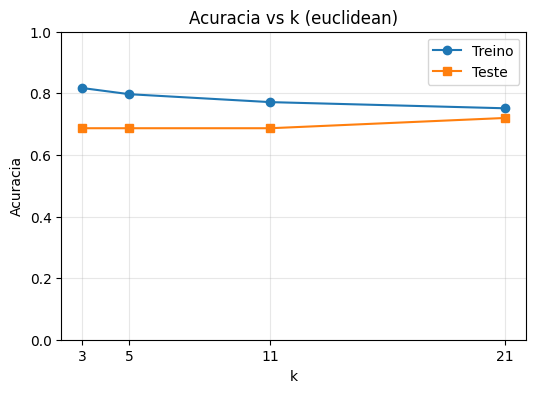

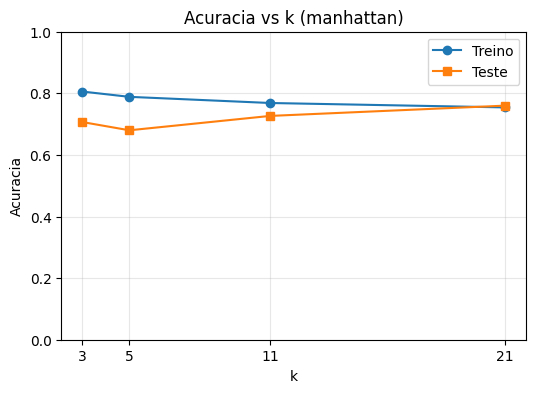

,metric,k,acc_train,acc_test
0,euclidean,3,0.817143,0.686667
1,euclidean,5,0.797143,0.686667
2,euclidean,11,0.771429,0.686667
3,euclidean,21,0.751429,0.720000
4,manhattan,3,0.805714,0.706667
5,manhattan,5,0.788571,0.680000
6,manhattan,11,0.768571,0.726667
7,manhattan,21,0.754286,0.760000


Melhor: k=21, metric=manhattan, acc_test=0.760
Acuracia (teste): 0.76
Matriz de confusao:
 [[107   1]
 [ 35   7]]

Relatorio:
               precision    recall  f1-score   support

           0      0.754     0.991     0.856       108
           1      0.875     0.167     0.280        42

    accuracy                          0.760       150
   macro avg      0.814     0.579     0.568       150
weighted avg      0.788     0.760     0.695       150


Estrato: Boa | n=71
[[53  1]
 [14  3]]


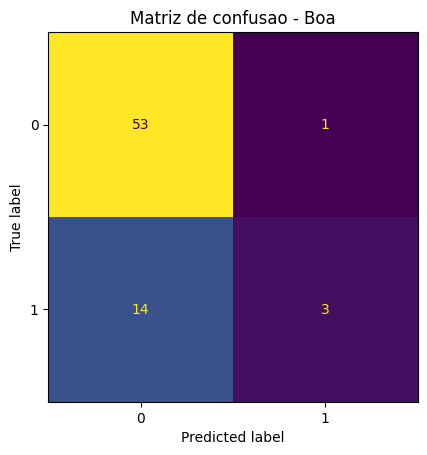


Estrato: Ruim | n=27
[[17  0]
 [ 8  2]]


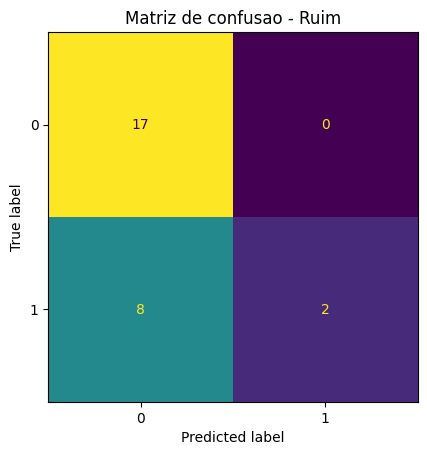


Estrato: Instável | n=52
[[37  0]
 [13  2]]


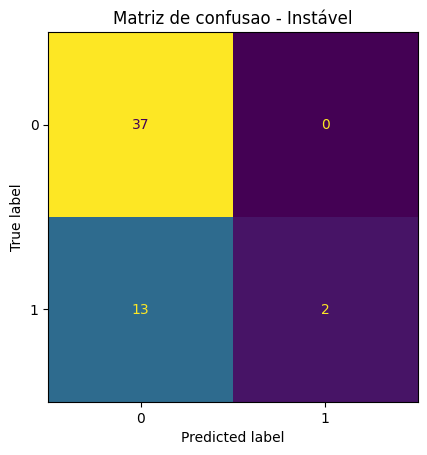

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Caminho do CSV
CSV_PATH = 'dataset_educacao_graduacao_brasil_500.csv'

# Leitura
df = pd.read_csv(CSV_PATH)
print('Formato:', df.shape)
print('\nInfo:')
df.info()
print('\nHead:')
display(df.head())
print('\nNulos:')
print(df.isna().sum().sort_values(ascending=False))

# Target e features
TARGET = 'Risco_Evasao'
base_features_num = [
    'Faltas_Percentual',
    'Trabalho_Horas_Semanais',
    'Deslocamento_Minutos',
    'Horas_Estudo_Semanais',
    'Nota_ENEM'
]
base_features_cat = ['Acesso_Internet','Modalidade','Tipo_IES']

features_num = [c for c in base_features_num if c in df.columns]
features_cat = [c for c in base_features_cat if c in df.columns]

# Drop target nulo e imput simples
df_model = df.dropna(subset=[TARGET]).copy()
num_impute_values = df_model[features_num].median(numeric_only=True)
for col in features_num:
    df_model[col] = df_model[col].fillna(num_impute_values[col])
for col in features_cat:
    df_model[col] = df_model[col].fillna('Desconhecido')

X = df_model[features_num + features_cat]
y = df_model[TARGET].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

preprocess = ColumnTransformer([
    ('num', StandardScaler(), features_num),
    ('cat', OneHotEncoder(handle_unknown='ignore'), features_cat)
])

# Busca k e métricas
k_values = [3,5,11,21]
metrics = ['euclidean','manhattan']
results = []
for metric in metrics:
    train_scores, test_scores = [], []
    for k in k_values:
        model = Pipeline([
            ('prep', preprocess),
            ('knn', KNeighborsClassifier(n_neighbors=k, metric=metric))
        ])
        model.fit(X_train, y_train)
        train_scores.append(model.score(X_train, y_train))
        test_scores.append(model.score(X_test, y_test))
        results.append({'metric': metric, 'k': k,
                        'acc_train': train_scores[-1], 'acc_test': test_scores[-1]})
    plt.figure(figsize=(6,4))
    plt.plot(k_values, train_scores, marker='o', label='Treino')
    plt.plot(k_values, test_scores, marker='s', label='Teste')
    plt.title(f'Acuracia vs k ({metric})')
    plt.xlabel('k'); plt.ylabel('Acuracia'); plt.ylim(0,1); plt.xticks(k_values)
    plt.grid(True, alpha=0.3); plt.legend(); plt.show()

results_df = pd.DataFrame(results).sort_values(['metric','k'])
display(results_df)

# Melhor config
best = results_df.sort_values('acc_test', ascending=False).iloc[0]
best_k, best_metric = int(best.k), best.metric
print(f'Melhor: k={best_k}, metric={best_metric}, acc_test={best.acc_test:.3f}')

best_model = Pipeline([
    ('prep', preprocess),
    ('knn', KNeighborsClassifier(n_neighbors=best_k, metric=best_metric))
])

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print('Acuracia (teste):', round(accuracy_score(y_test, y_pred), 4))
cm = confusion_matrix(y_test, y_pred)
print('Matriz de confusao:\n', cm)
print('\nRelatorio:\n', classification_report(y_test, y_pred, digits=3))

# Estratos por Acesso_Internet
if 'Acesso_Internet' in X_test.columns:
    for cat in X_test['Acesso_Internet'].unique():
        mask = (X_test['Acesso_Internet'] == cat)
        if mask.sum() == 0:
            continue
        cm_g = confusion_matrix(y_test[mask], y_pred[mask])
        print(f'\nEstrato: {cat} | n={mask.sum()}')
        print(cm_g)
        ConfusionMatrixDisplay(cm_g).plot(colorbar=False)
        plt.title(f'Matriz de confusao - {cat}')
        plt.show()
else:
    print('Sem coluna Acesso_Internet em X_test')
